# Data Exploration

This notebook will walk you through different ways we can look at data to gain a better understanding of our data, build intuition, and start hypothesis testing. By the end of this workshop, participants will have some data exploration skills in their toolbox to conduct which lays a solid foundation for any subsequent machine learning or data analysis projects.

It is assumed that you have two datafiles required stored in 'INPUTS/' folder:
1. CQ_Data_20240602.txt
2. WtshdAttributeTable_20240602.txt

In [4]:
# Import all libraries at the top of your code so you can easily see and organize all the packges you are using. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

pd.set_option('display.max_columns', None)

In [1]:
# Set up the filepaths
inputDataFilepath ='C:/Users/danyk/Work/4_Data_Science/DataExplorationWorkshop/INPUTS/'

In [6]:
# Loading in the concentration, flow, and attribute data.
CQ = pd.read_csv(inputDataFilepath+'CQ_Data_20240602.txt', sep=",", dtype={'SITE': str, 'HUC02': str})
WtshdAtt = pd.read_csv(inputDataFilepath+'WtshdAttributeTable_20240602.txt', sep=",", dtype={'SITE': str, 'HUC02': str})
                     
# Adding a Year and month columns
CQ['YEAR'] = pd.DatetimeIndex(CQ['Date']).year
CQ['MONTH'] = pd.DatetimeIndex(CQ['Date']).month

# Merging CQ data with their watershe attributes
CQ_attrib = CQ.merge(WtshdAtt, on=['SITE','YEAR'], how='left')
CQ_attrib.head()

,AREA,PERIMETER,GAGE_ID,layer,path,geometry
0,37461600.0,30716.1,15019990,bas_nonref_AKHIPR,C:/Users/danyk/Work/4_Data_Science/DataExplora...,"POLYGON ((-2282821.750 4086730.000, -2282935.0..."
1,59634500.0,49383.1,15026000,bas_nonref_AKHIPR,C:/Users/danyk/Work/4_Data_Science/DataExplora...,"POLYGON ((-2331871.750 4206704.500, -2331921.7..."
2,24657400.0,27015.8,15050000,bas_nonref_AKHIPR,C:/Users/danyk/Work/4_Data_Science/DataExplora...,"POLYGON ((-2374254.250 4364922.500, -2374305.5..."
3,25112200.0,22705.4,15051010,bas_nonref_AKHIPR,C:/Users/danyk/Work/4_Data_Science/DataExplora...,"POLYGON ((-2373179.250 4369148.500, -2373290.7..."
4,132464000.0,59947.3,15081497,bas_nonref_AKHIPR,C:/Users/danyk/Work/4_Data_Science/DataExplora...,"POLYGON ((-2407289.000 4088722.000, -2407276.7..."


## Understanding your watersheds. 
Before jumping into finding that patterns and trends we see, let's take a look at our data. We want to explore the spatial coverage and type of watersheds that are in our dataset. This step will help guide us on the type of questions or hypothesis we can ask with the data we have.

In [65]:
# Loading in the watershed shapefile. 
wtshd = gpd.read_file(inputDataFilepath+'boundaries-shapefiles-by-aggeco/bas_all.shp')
wtshd = wtshd.rename(columns={'GAGE_ID':'SITE'})
US_boundary = gpd.read_file(inputDataFilepath+'cb_2017_us_state_5m/cb_2017_us_state_5m.shp')
wtshd_f = wtshd[wtshd['SITE'].isin(CQ_attrib['SITE'])]
US_boundary = US_boundary.to_crs(wtshd_f.crs)

(0.0, 3500000.0)

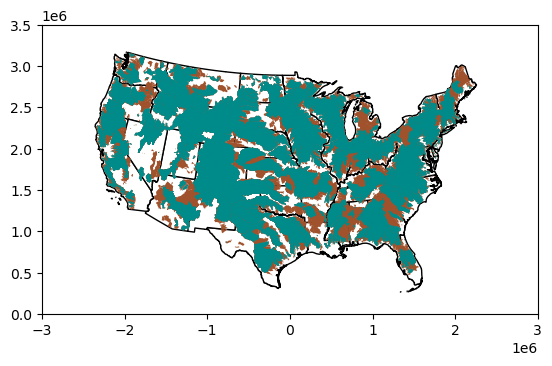

In [28]:
# Let's compare all GAGE watersheds to the dataset that has water quality samples. 

# Task: Plot the watershed shapefile and the filtered watershed shapefile. 
# Syntax: shapefile.plot(ax=[basemap], color='colorName')

# I've plotted the base map, you plot the other 2.
base = US_boundary.plot(color='white', edgecolor='black')

wtshd.plot(ax=base, color='sienna')
wtshd_f.plot(ax=base, color='darkcyan')
base.set_xlim(-3*10**6, 3*10**6)
base.set_ylim(0, 3.5*10**6)

That's some decent coverage! We have watersheds across the entire contiguous US, including some of the more data sparse watersheds in the west. 

Let's look at the attributes and understanding the distribution of our data. First we will start with the univariate approach, which just means looking at one variable at a time. There are a few ways to go about this.. 

- '.describe()' will print out the summary statistics of your variable.
- 'boxplots' can be used to visualize the summary statistics but not the most intuitive to understand the distribution. 
- 'histogram' are great to see the distribution, but understanding the summary statistics can be a challenge.

Using multiple approaches can help get a better understanding of the data. 

In [33]:
CQ_attrib.columns

Index(['SITE', 'NAME', 'AREA_SQKM', 'HUC02', 'LAT', 'LONG', 'STATE',
       'HCDN-2009', 'CLASS', 'AGGECOREGION', 'Date', 'Q_m3s', 'Conc', 'YEAR',
       'MONTH', 'UrbLU_pct', 'NatLU_pct', 'AgLU_pct', 'FERT_kgkm2',
       'MANU_kgkm2', 'BFI_AVE', 'SLOPE_pct', 'AI', 'medianGWD_m', 'TD_pct'],
      dtype='object')

In [154]:
CQ_attrib['AREA_SQKM'].describe()

count    146533.000000
mean       5594.783380
std        9377.447883
min           1.600000
25%         277.400000
50%        1554.800000
75%        5405.600000
max       49802.300000
Name: AREA_SQKM, dtype: float64

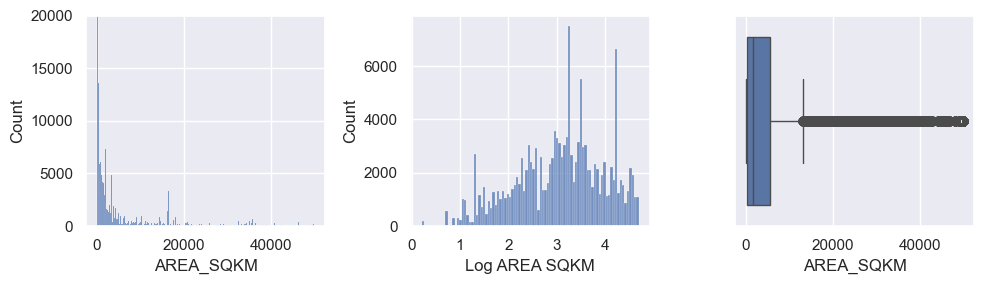

In [44]:
fig, axs = plt.subplots(1,3, figsize=(10, 3))

ax1 = plt.subplot(1,3,1)
sns.histplot(data=CQ_attrib, x="AREA_SQKM", ax=ax1)
ax1.set_ylim(0,20000)

ax2 = plt.subplot(1,3,2)
sns.histplot(x=np.log10(CQ_attrib['AREA_SQKM']), ax=ax2)
plt.tight_layout()
plt.xlabel('Log AREA SQKM')

ax3 = plt.subplot(1,3,3)
sns.boxplot(x=CQ_attrib['AREA_SQKM'], ax=ax3)
plt.tight_layout()

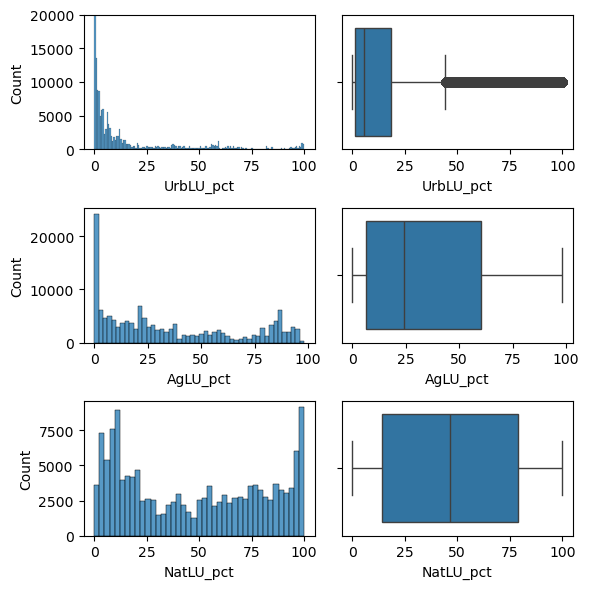

In [155]:
fig, axs = plt.subplots(3,2, figsize=(6, 6))

ax1 = plt.subplot(3,2,1)
sns.histplot(data=CQ_attrib, x="UrbLU_pct", ax=ax1)
ax1.set_ylim(0,20000)


ax2 = plt.subplot(3,2,2)
sns.boxplot(x=CQ_attrib['UrbLU_pct'], ax=ax2)

ax3 = plt.subplot(3,2,3)
sns.histplot(data=CQ_attrib, x="AgLU_pct", ax=ax3)
#ax1.set_ylim(0,40000)

ax4 = plt.subplot(3,2,4)
sns.boxplot(x=CQ_attrib['AgLU_pct'], ax=ax4)

ax5 = plt.subplot(3,2,5)
sns.histplot(data=CQ_attrib, x="NatLU_pct", ax=ax5)
#ax1.set_ylim(0,40000)

ax6 = plt.subplot(3,2,6)
sns.boxplot(x=CQ_attrib['NatLU_pct'], ax=ax6)
plt.tight_layout()

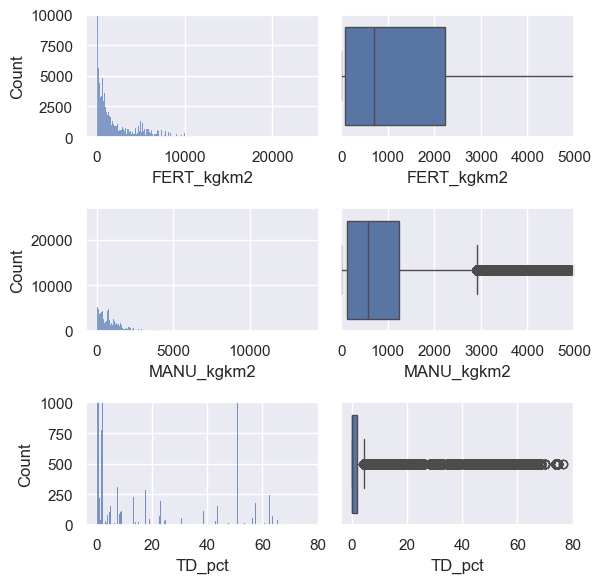

In [93]:
fig, axs = plt.subplots(3,2, figsize=(6, 6))

ax1 = plt.subplot(3,2,1)
sns.histplot(data=CQ_attrib, x="FERT_kgkm2", ax=ax1)
ax1.set_ylim(0,10000)

ax2 = plt.subplot(3,2,2)
sns.boxplot(x=CQ_attrib['FERT_kgkm2'], ax=ax2)
ax2.set_xlim(0,5000)

ax3 = plt.subplot(3,2,3)
sns.histplot(data=CQ_attrib, x="MANU_kgkm2", ax=ax3)
ax4.set_ylim(0,5000)

ax4 = plt.subplot(3,2,4)
sns.boxplot(x=CQ_attrib['MANU_kgkm2'], ax=ax4)
ax4.set_xlim(0,5000)

ax5 = plt.subplot(3,2,5)
sns.histplot(data=CQ_attrib, x="TD_pct", ax=ax5)
ax5.set_ylim(0,1000)

ax6 = plt.subplot(3,2,6)
sns.boxplot(x=CQ_attrib['TD_pct'], ax=ax6)
plt.tight_layout()

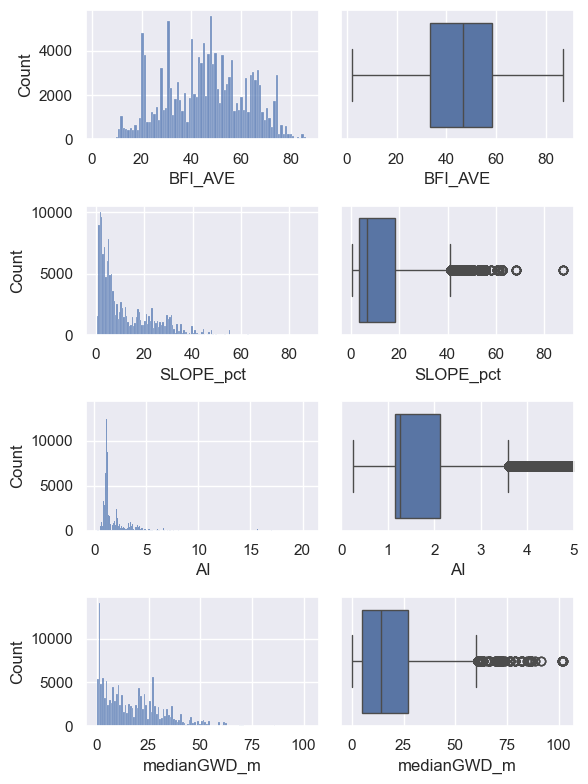

In [92]:
# PLotting the final attributes
fig, axs = plt.subplots(4,2, figsize=(6, 8))

ax1 = plt.subplot(4,2,1)
sns.histplot(data=CQ_attrib, x="BFI_AVE", ax=ax1)

ax2 = plt.subplot(4,2,2)
sns.boxplot(x=CQ_attrib['BFI_AVE'], ax=ax2)

ax3 = plt.subplot(4,2,3)
sns.histplot(data=CQ_attrib, x="SLOPE_pct", ax=ax3)

ax4 = plt.subplot(4,2,4)
sns.boxplot(x=CQ_attrib['SLOPE_pct'], ax=ax4)

ax5 = plt.subplot(4,2,5)
sns.histplot(data=CQ_attrib, x="AI", ax=ax5)

ax6 = plt.subplot(4,2,6)
sns.boxplot(x=CQ_attrib['AI'], ax=ax6)
ax6.set_xlim(0,5)

ax7 = plt.subplot(4,2,7)
sns.histplot(data=CQ_attrib, x="medianGWD_m", ax=ax7)

ax8 = plt.subplot(4,2,8)
sns.boxplot(x=CQ_attrib['medianGWD_m'], ax=ax8)
plt.tight_layout()

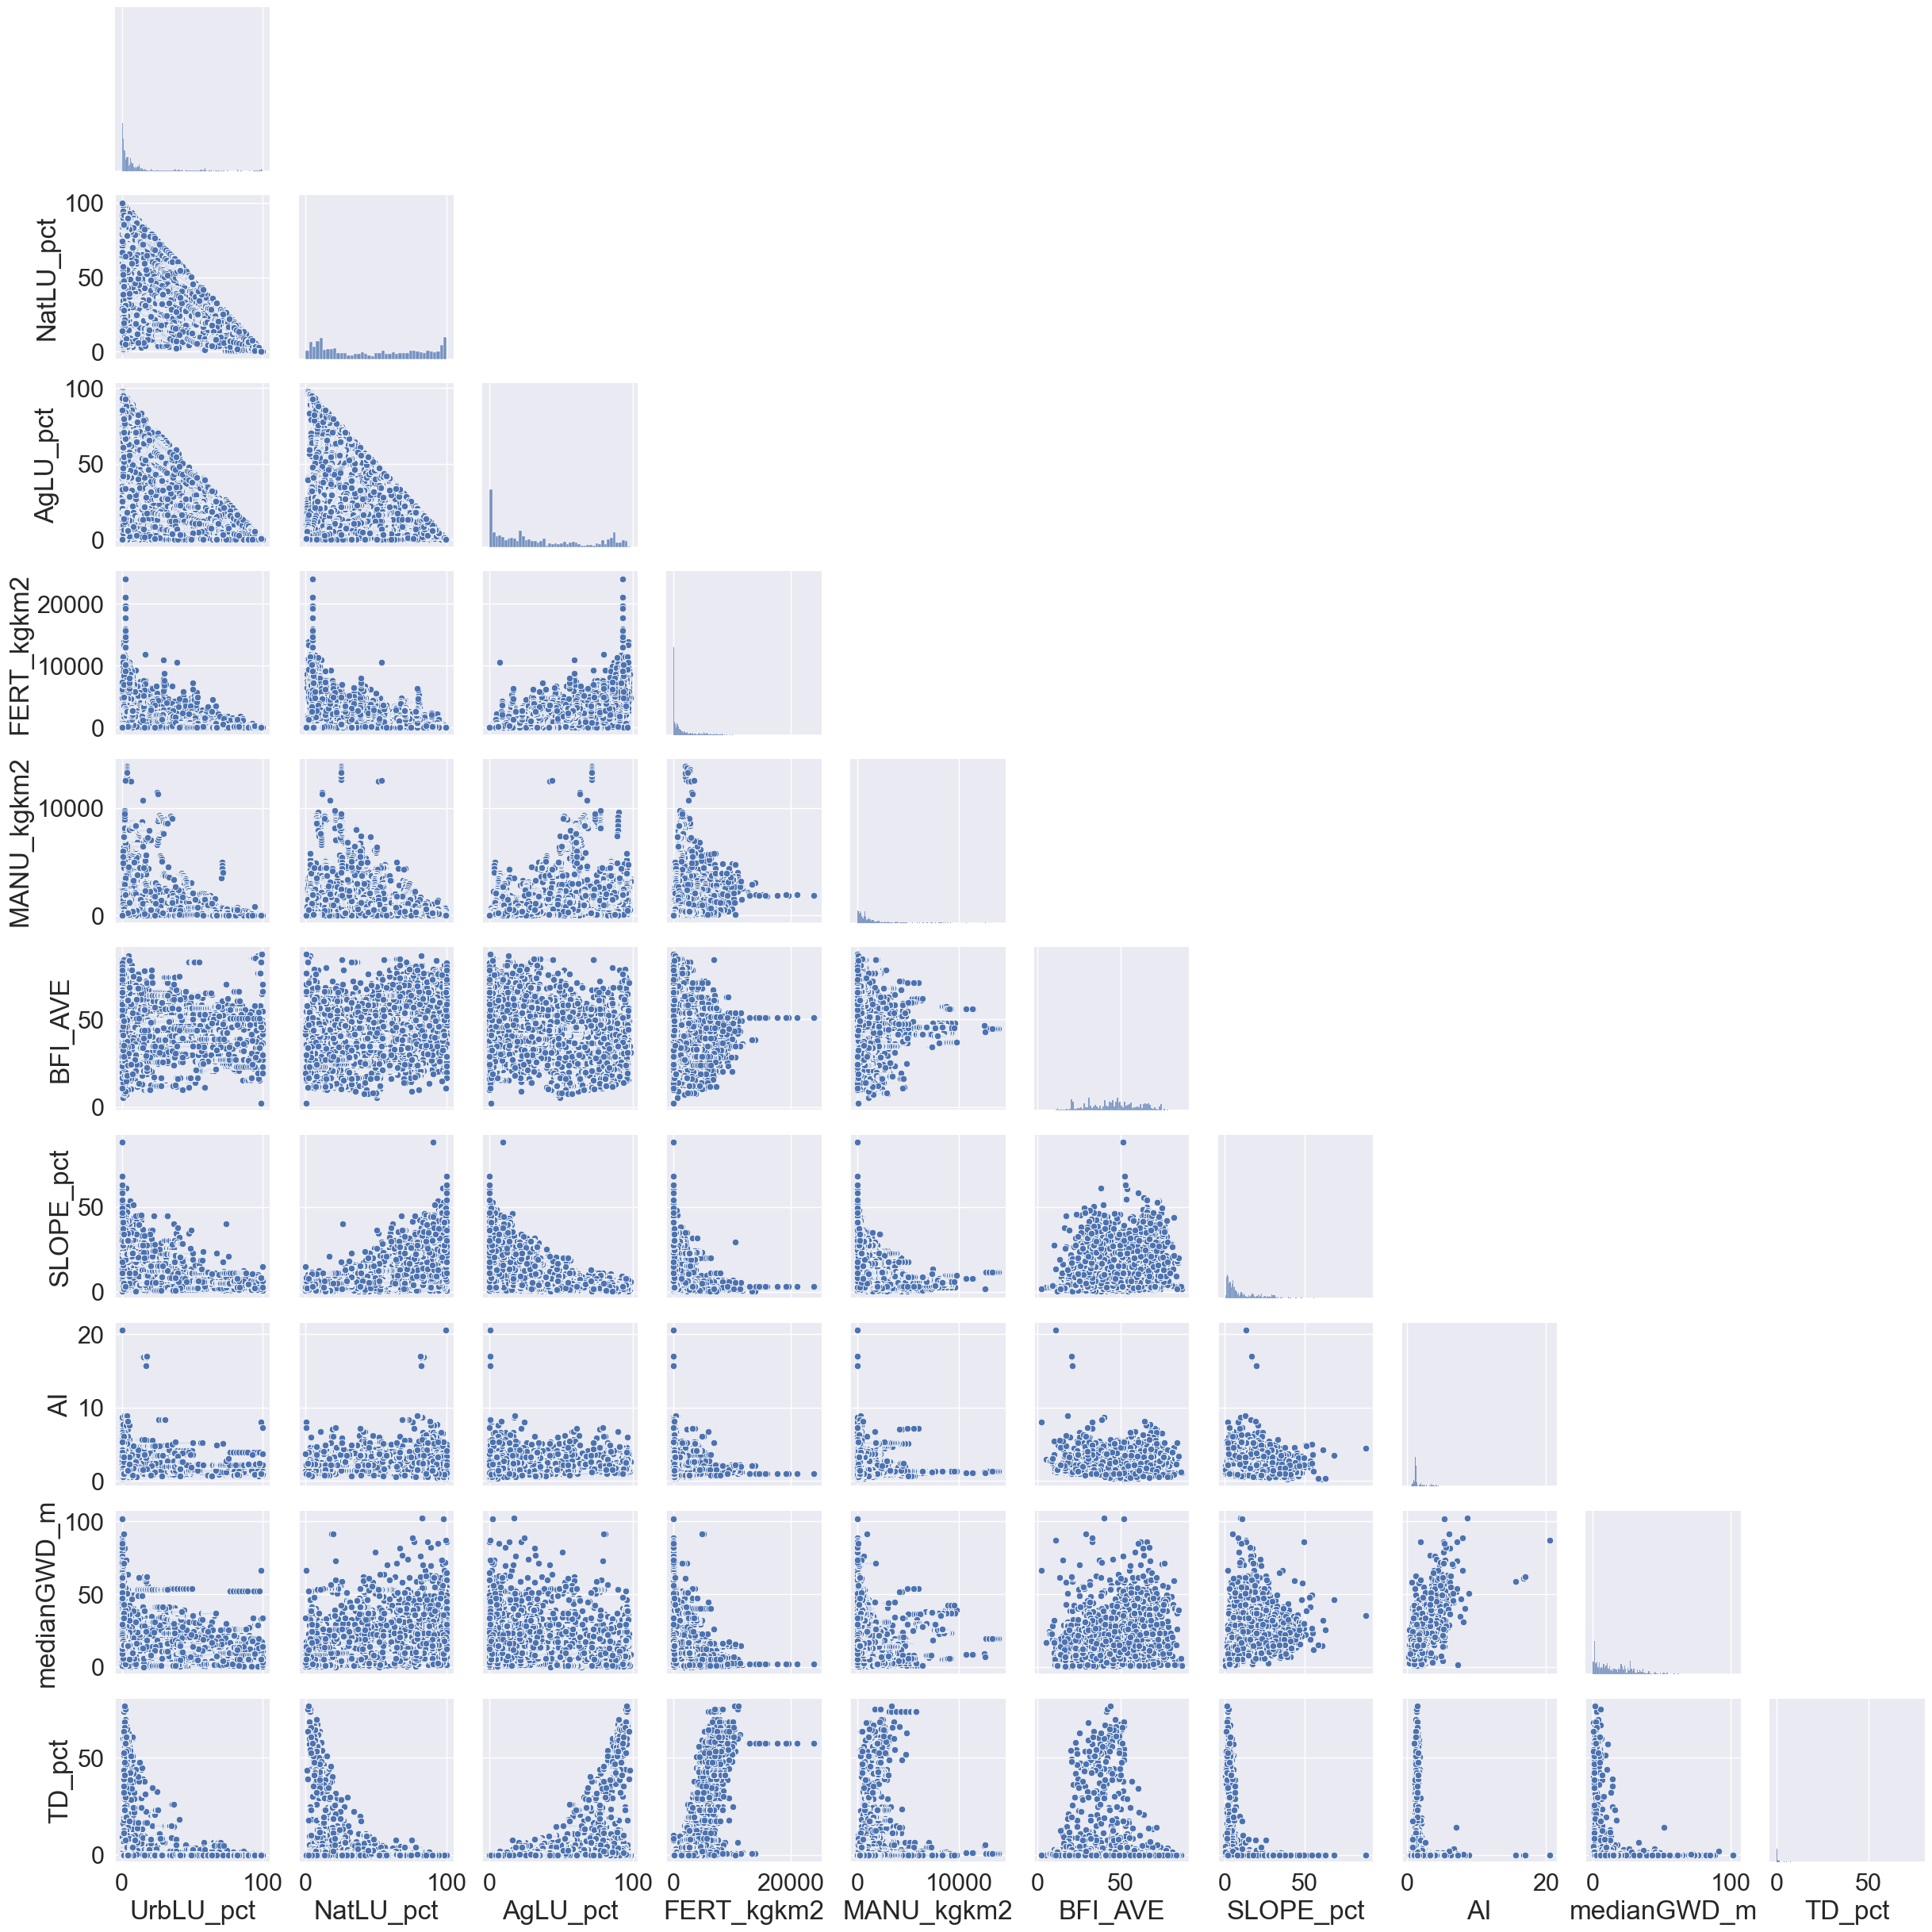

In [36]:
# Now for the multivariate
CQ_attrib_filtered = CQ_attrib[['UrbLU_pct', 'NatLU_pct', 'AgLU_pct', 'FERT_kgkm2',
       'MANU_kgkm2', 'BFI_AVE', 'SLOPE_pct', 'AI', 'medianGWD_m', 'TD_pct']]
sns.set(font_scale=1.5)
sns.pairplot(CQ_attrib_filtered, corner=True)

Text(0.5, 20.049999999999997, 'Log Flow rate')

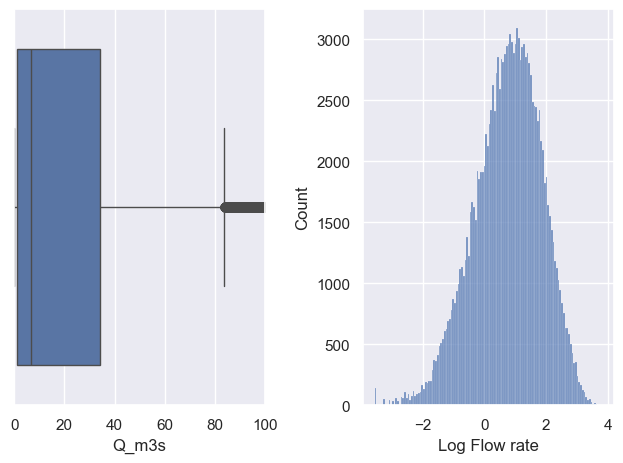

In [50]:
# Now let's look at the flows and concentrations!
sns.set(font_scale=1) # Scaling it back down
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=CQ_attrib, x="Q_m3s")
ax1.set_xlim(0,100)

ax2 = plt.subplot(1,2,2)
sns.histplot(x=np.log10(CQ_attrib['Q_m3s']), ax=ax2)
plt.tight_layout()
plt.xlabel('Log Flow rate')

In [51]:
CQ_attrib['Q_m3s'].describe()

count    146533.000000
mean         56.321007
std         180.996967
min           0.000283
25%           1.149664
50%           6.824360
75%          34.263384
max        6796.043182
Name: Q_m3s, dtype: float64

Text(0.5, 20.049999999999997, 'Conc (mg-N/L)')

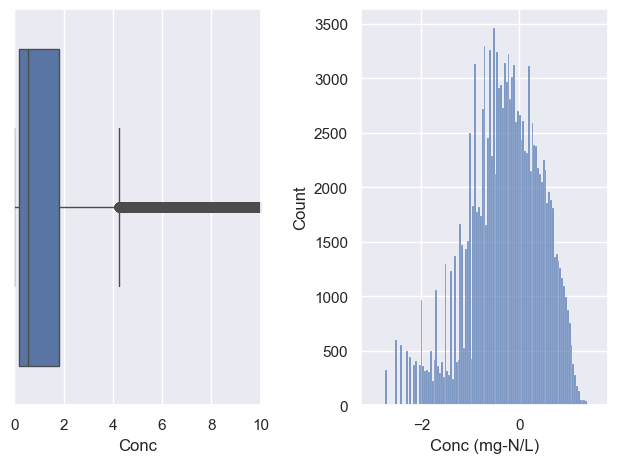

In [56]:
# Now let's look at the flows and concentrations!
sns.set(font_scale=1) # Scaling it back down
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=CQ_attrib, x="Conc")
ax1.set_xlim(0,10)

ax2 = plt.subplot(1,2,2)
sns.histplot(x=np.log10(CQ_attrib['Conc']), ax=ax2)
plt.tight_layout()
plt.xlabel('Conc (mg-N/L)')

In [57]:
CQ_attrib['Conc'].describe()

count    146533.000000
mean          1.563895
std           2.456083
min           0.001000
25%           0.180000
50%           0.560000
75%           1.810000
max          37.200000
Name: Conc, dtype: float64

In [63]:
wtshd_f.columns

Index(['AREA', 'PERIMETER', 'GAGE_ID', 'layer', 'path', 'geometry'], dtype='object')

In [103]:
meanC = CQ_attrib.groupby('SITE')['Conc'].mean().reset_index()
meanC_shp = wtshd_f.merge(meanC, on='SITE')

base = US_boundary.plot(color='white', edgecolor='black', ax=ax1)

meanC_shp.plot(ax=base, 
               column='Conc', 
               cmap='OrRd',
               legend = False,
               vmin=0,
               vmax=10,
               edgecolor='none')

# Entire US
base.set_xlim(-3*10**6, 3*10**6)
base.set_ylim(0, 3.5*10**6)
plt.show()
# Midwest
#base.set_xlim(-0.5*10**6, 1.25*10**6)
#base.set_ylim(1.5*10**6, 3*10**6)

# Western US
#base.set_xlim(-3*10**6,0.5*10**6)
#base.set_ylim(0.5*10**6, 2.25*10**6)

<Figure size 640x480 with 0 Axes>